In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Mean Absolute Percentage Error (MAPE) Plot

The following plot illustrates the Mean Absolute Percentage Error (MAPE) for different measurement conditions. The conditions include various combinations of planar and depth measurements using different methods. The MAPE values are represented as percentages.

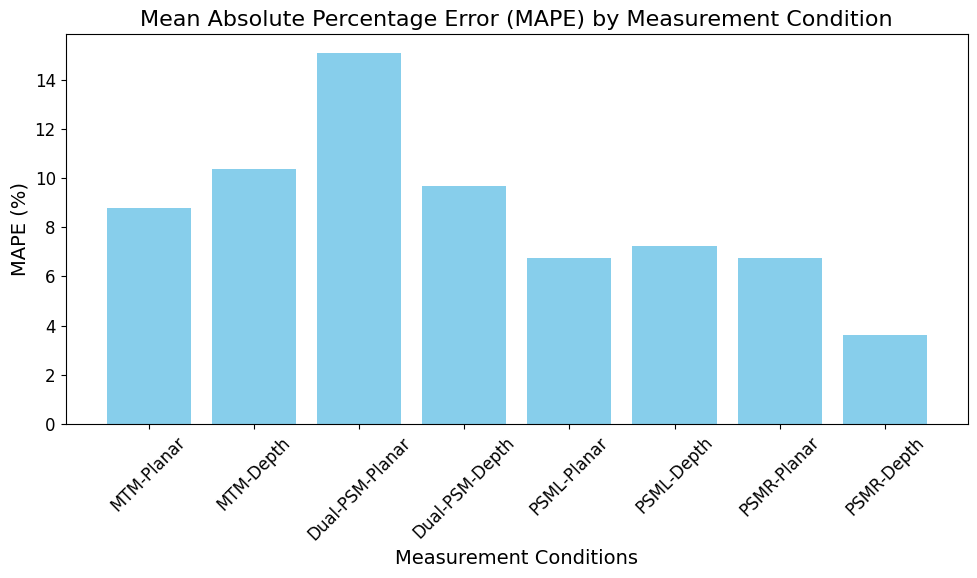

In [3]:
conditions = ['MTM-Planar', 'MTM-Depth', 'Dual-PSM-Planar', 'Dual-PSM-Depth', 'PSML-Planar', 'PSML-Depth', 'PSMR-Planar', 'PSMR-Depth']
mape_values = [8.78, 10.37, 15.09, 9.67, 6.73, 7.23, 6.75, 3.61]

plt.figure(figsize=(10, 6))
plt.bar(conditions, mape_values, color='skyblue')
plt.xlabel('Measurement Conditions')
plt.ylabel('MAPE (%)')
plt.title('Mean Absolute Percentage Error (MAPE) by Measurement Condition')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Bland-Altman Analysis

Bland-Altman analysis is a method to compare two measurement techniques. It involves plotting the differences between the two techniques against their averages. This type of plot helps to identify any systematic bias between the techniques and to visualize the agreement between them.

In [4]:
file_path = 'UserStudyData.xlsx'
df = pd.read_excel(file_path, sheet_name=0)

In [5]:
# Ground truth for each condition
ground_truth_1 = 35.92
ground_truth_2 = 50.96

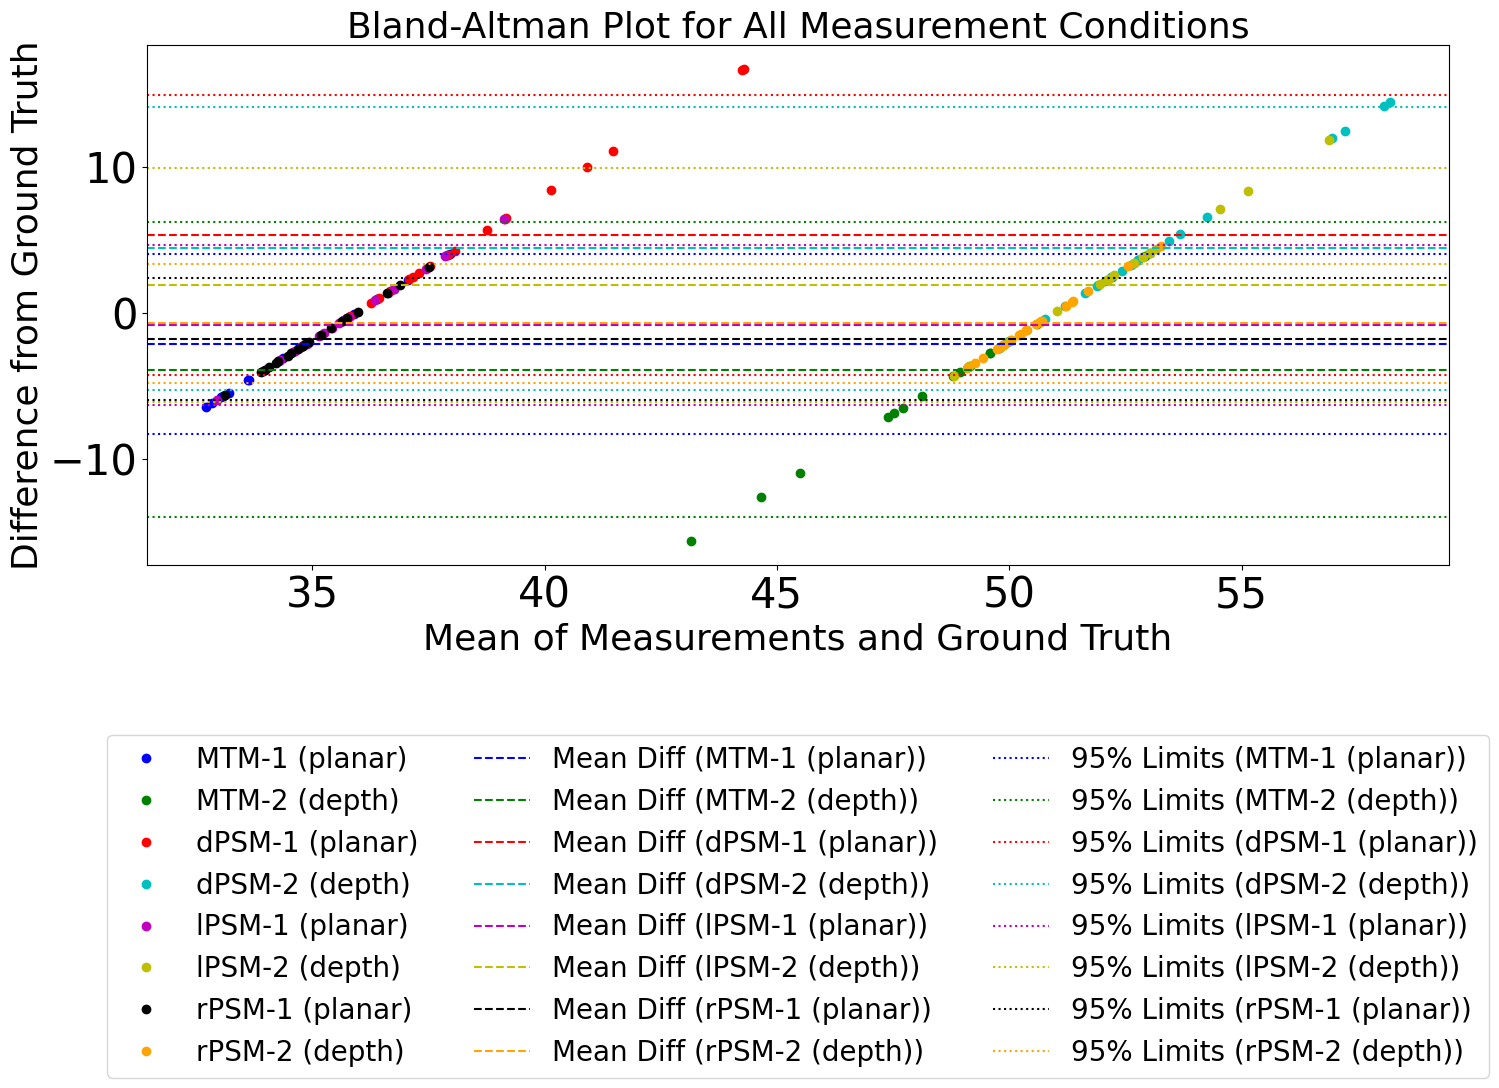

In [30]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Set font sizes for the plot
plt.rc('font', size=30)          # Default text size
plt.rc('axes', titlesize=26)     # Font size of the axes title
plt.rc('axes', labelsize=26)     # Font size of x and y labels
plt.rc('xtick', labelsize=30)    # Font size of the tick labels
plt.rc('ytick', labelsize=30)    # Font size of the tick labels
plt.rc('legend', fontsize=20)    # Legend font size
plt.rc('figure', titlesize=30)   # Figure title size

# Extract the data columns for each condition
mtm1 = df['MTM-1 (planar)']
mtm2 = df['MTM-2 (depth)']
dpsm1 = df['dPSM-1 (planar)']
dpsm2 = df['dPSM-2 (depth)']
lpsm1 = df['lPSM-1(planar)']
lpsm2 = df['lPSM-2 (depth)']
rpsm1 = df['rPSM-1(planar)']
rpsm2 = df['rPSM-2 (depth)']

# Calculate mean values and differences for each measurement
mean_values_list = [
    df['MTM-1 (planar)'].iloc[95:115].values,
    df['MTM-2 (depth)'].iloc[95:115].values,
    df['dPSM-1 (planar)'].iloc[95:115].values,
    df['dPSM-2 (depth)'].iloc[95:115].values,
    df['lPSM-1(planar)'].iloc[95:115].values,
    df['lPSM-2 (depth)'].iloc[95:115].values,
    df['rPSM-1(planar)'].iloc[95:115].values,
    df['rPSM-2 (depth)'].iloc[95:115].values,
]

differences_list = [
    df['MTM-1 (planar)'].iloc[116:136].values,
    df['MTM-2 (depth)'].iloc[116:136].values,
    df['dPSM-1 (planar)'].iloc[116:136].values,
    df['dPSM-2 (depth)'].iloc[116:136].values,
    df['lPSM-1(planar)'].iloc[116:136].values,
    df['lPSM-2 (depth)'].iloc[116:136].values,
    df['rPSM-1(planar)'].iloc[116:136].values,
    df['rPSM-2 (depth)'].iloc[116:136].values,
]

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange']
labels = ['MTM-1 (planar)', 'MTM-2 (depth)', 'dPSM-1 (planar)', 'dPSM-2 (depth)',
          'lPSM-1 (planar)', 'lPSM-2 (depth)', 'rPSM-1 (planar)', 'rPSM-2 (depth)']

# Create the Bland-Altman plot
plt.figure(figsize=(16, 10))

# Plot each set of measurements and lines
for mean_values, differences, color, label in zip(mean_values_list, differences_list, colors, labels):
    # Scatter plot
    plt.scatter(mean_values, differences, color=color, label=label)

    # Calculate statistics
    mean_diff = differences.mean()
    std_diff = differences.std()
    upper_limit = mean_diff + 1.96 * std_diff
    lower_limit = mean_diff - 1.96 * std_diff

    # Plot mean difference and limits
    plt.axhline(mean_diff, color=color, linestyle='--', label=f'Mean Diff ({label})')
    plt.axhline(upper_limit, color=color, linestyle=':', label=f'95% Limits ({label})')
    plt.axhline(lower_limit, color=color, linestyle=':')

plt.xlabel('Mean of Measurements and Ground Truth')
plt.ylabel('Difference from Ground Truth')
plt.title('Bland-Altman Plot for All Measurement Conditions')

# Create custom legend handles to avoid duplicates
scatter_handles = [Line2D([], [], marker='o', color=color, linestyle='None', label=label) for color, label in zip(colors, labels)]
mean_handles = [Line2D([], [], color=color, linestyle='--', label=f'Mean Diff ({label})') for color, label in zip(colors, labels)]
limit_handles = [Line2D([], [], color=color, linestyle=':', label=f'95% Limits ({label})') for color, label in zip(colors, labels)]

# Combine handles
handles = scatter_handles + mean_handles + limit_handles

# Place the legend below the plot
plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(0.5, -0.3), ncol=3)

plt.tight_layout()
plt.subplots_adjust(bottom=0.4)  # Increase bottom margin to accommodate legend

# Save the plot as an SVG file
# plt.savefig('bland_altman_plot.svg', format='svg')

# Save the plot as a PDF file
plt.savefig('bland_altman_plot.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()
